# Import Libraries

In [84]:
import numpy as np
from tensorflow import keras
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import time

from keras.callbacks import Callback

# Initialize Datasets

In [40]:
x_train = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_train = np.array([    
    [0],
    [1],
    [1],
    [0]
])

x_test = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_test = np.array([    
    [0],
    [1],
    [1],
    [0]
])

## Convert python list to numpy list

# Build Model - ReLU

In [41]:
model_relu = keras.Sequential()

# Add first layer
model_relu.add(Dense(5, activation='relu', input_shape=(2,)))

# Add second layer
# the number of output node is one since its binary result
model_relu.add(Dense(1, activation='sigmoid'))

# optimizer: Adam
adam = keras.optimizers.Adam(learning_rate=0.01)
model_relu.compile(loss='binary_crossentropy', optimizer=adam)

# sumamry
model_relu.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 5)                 15        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


# Build Model - Sigmoid

In [42]:
model_sigm = keras.Sequential()

# Add first layer
model_sigm.add(Dense(5, activation='sigmoid', input_shape=(2,)))

# Add second layer
# the number of output node is one since its binary result
model_sigm.add(Dense(1, activation='sigmoid'))

# optimizer: Adam
adam = keras.optimizers.Adam(learning_rate=0.01)
model_sigm.compile(loss='binary_crossentropy', optimizer=adam)

# sumamry
model_sigm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 15        
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


# Make Callback function for plotting

In [52]:
class lossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.loss = []

    def on_epoch_end(self, batch, logs={}):
        self.loss.append(logs.get('loss'))
        
loss_relu = lossHistory()

# Train Model

In [88]:
tic_r = time.time()
model_relu.fit(x_train, y_train, batch_size=4, epochs=100, callbacks=loss_relu, verbose=0)
toc_r = time.time()
tic_s = time.time()
model_sigm.fit(x_train, y_train, batch_size=4, epochs=100, callbacks=loss_sigm, verbose=0)
toc_s = time.time()

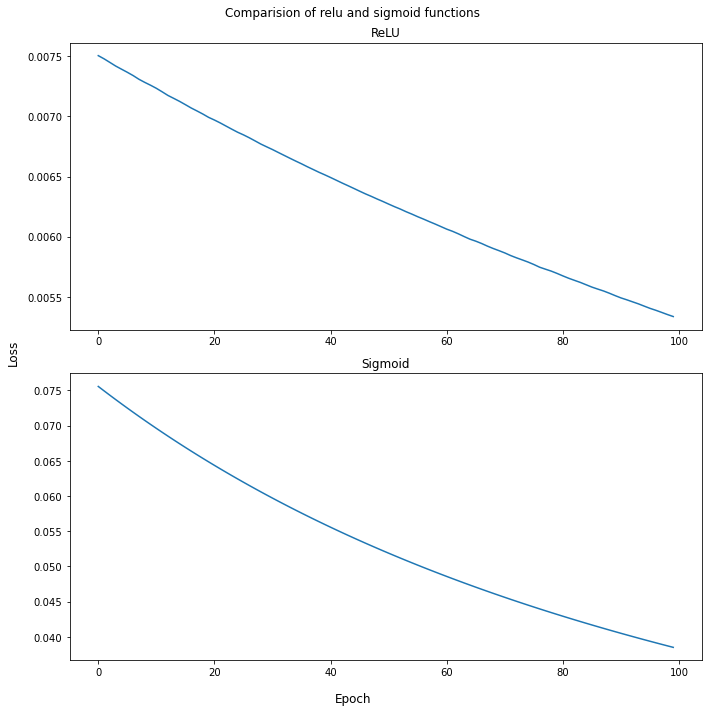

In [89]:
# loss_relu = np.array(loss_relu.loss, dtype=int)
# loss_sigm = np.array(loss_sigm, dtype=int)

fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(loss_relu.loss)
ax[0].set_title('ReLU')
ax[1].plot(loss_sigm.loss)
ax[1].set_title('Sigmoid')
fig.suptitle('Comparision of relu and sigmoid functions')
fig.supxlabel('Epoch')
fig.supylabel('Loss')
fig.tight_layout()

In [90]:
pred_relu = model_relu.predict(x_test)
pred_sigm = model_sigm.predict(x_test)
print(f'final loss of ReLU: {round(loss_relu.loss[-1], 4)}')
print(f'final loss of Sigmoid: {round(loss_sigm.loss[-1], 4)}')
print()
print(f'elapsed time of ReLU: {toc_r-tic_r}s')
print(f'elapsed time of Sigmoid: {toc_s-tic_s}s')
print()
print(f'   ReLU\n{pred_relu}')
print()
print(f'   ReLU-round\n{np.round(pred_relu)}')
print()
print(f'   Sigmoid\n{pred_sigm}')
print()
print(f'   Sigmoid-round\n{np.round(pred_sigm)}')

1/1 [==============================] - 0s 11ms/step
final loss of ReLU: 0.0053
final loss of Sigmoid: 0.0385

elapsed time of ReLU: 0.17103910446166992s
elapsed time of Sigmoid: 0.13503098487854004s

   ReLU
[[0.00613688]
 [0.9951295 ]
 [0.9947708 ]
 [0.00498377]]

   ReLU-round
[[0.]
 [1.]
 [1.]
 [0.]]

   Sigmoid
[[0.01294002]
 [0.953342  ]
 [0.96706057]
 [0.05713532]]

   Sigmoid-round
[[0.]
 [1.]
 [1.]
 [0.]]
